# Parallel Coordinates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style("whitegrid")

In [2]:
X = pd.read_csv("./data/X.csv", header=None)

The matrix X contains 124 observations of 4 variables. The kmeans class can also return the centroids of each group.

In [3]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


We can use the [parallel_coordinates()](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html#pandas-plotting-parallel-coordinates) function to visualize the results.

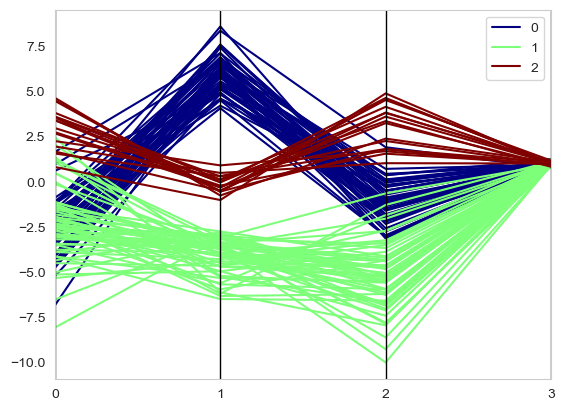

In [4]:
aux = X.copy()
aux['labels'] = labels
aux.sort_values(by='labels', inplace=True)

plt.figure()
pd.plotting.parallel_coordinates(aux, "labels", colormap='jet')
plt.show()

When we have a large number of observations, visualizing every observation can create clutter. Instead, we can visualize only the centroid of each cluster.

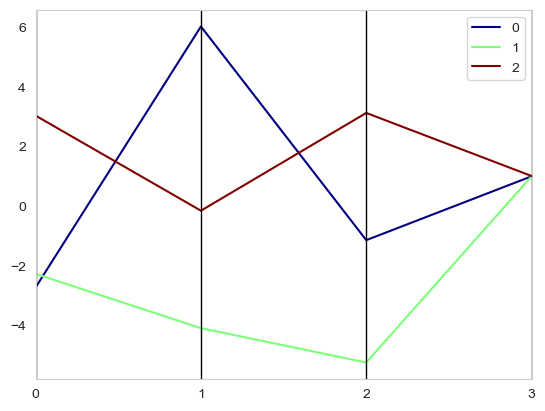

In [5]:
aux = pd.DataFrame(centers)
aux['labels'] = range(0, 3)

plt.figure()
pd.plotting.parallel_coordinates(aux, "labels", colormap='jet')
plt.show()

Another option is to plot the median values for each group with bounding lines. In addition, we can use the [quantile()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html#pandas-dataframe-quantile) function with a value between 0 and 1.

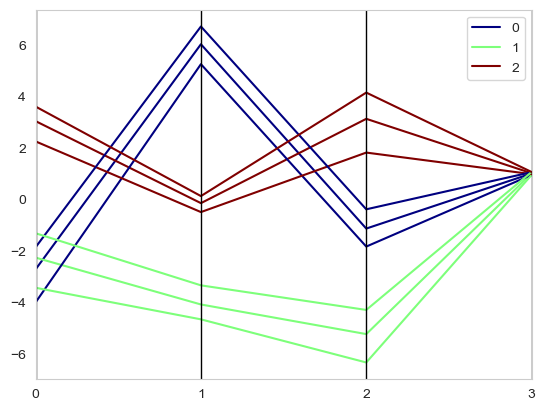

In [6]:
a = pd.DataFrame()
a = pd.concat([a, aux])
aux = X.copy()
aux['labels'] = labels
for i in [0.25, 0.75]:
    a = pd.concat([a, aux.groupby(by='labels').quantile(i).reset_index()])

plt.figure()
pd.plotting.parallel_coordinates(a, "labels", colormap='jet')
plt.show()